In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_excel("INPUT SET 2.xlsx")

In [3]:
# splitting the remaining data in training data and validation data. 
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.3, shuffle = False)

In [4]:
# Scaling the data using MinMax Scaler.
scaler = MinMaxScaler()
X_train = scaler.fit_transform(df_train.drop(["Year4"],axis=1).values)
Y_train = scaler.fit_transform(df_train["Year4"].values.reshape(-1,1))
X_test = scaler.fit_transform(df_test.drop(["Year4"],axis=1).values)
Y_test = scaler.fit_transform(df_test["Year4"].values.reshape(-1,1))

In [5]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(940, 3)
(940, 1)
(404, 3)
(404, 1)


In [6]:
# function to denormalise the predicted values.
def denormalize(df,norm_data):
    df = df["Year4"].values.reshape(-1,1)
    norm_data = norm_data.reshape(-1,1)
    scl = MinMaxScaler()
    a = scl.fit_transform(df)
    new = scl.inverse_transform(norm_data)
    
    return new

In [7]:
# variables required for model creation.
x_data = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y_target = tf.placeholder(shape=[None,1], dtype = tf.float32)
W = tf.Variable(tf.random_normal(shape=[3,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [8]:
# output equation of linear regression model i.e. y_predicted = X_data.W + b
y_predicted = tf.add(tf.matmul(x_data, W), b)

In [9]:
# loss function = MSE (Mean Square Error)
cost = tf.reduce_mean(tf.square(y_predicted-y_target))

In [10]:
# Using Gradient Descent as the optimization algorithm.
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [11]:
train_loss = []
test_loss = [] 
batch_size =  100

In [12]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#Loop for training the linear regression model.

for i in range(100):
        
    train_indices = np.random.choice(len(X_train), batch_size, replace=False)
    x = X_train[train_indices]
    y = Y_train[train_indices]
        
    for j in range(x.shape[0]):
        
        sess.run([cost,train],feed_dict={x_data:x[j,:].reshape(1,3), y_target:y[j].reshape(1,1)})
            
    train_loss.append(sess.run(cost, feed_dict={x_data:X_train,y_target:Y_train}))
    test_loss.append(sess.run(cost, feed_dict={x_data:X_test,y_target:Y_test}))
    print('Epoch :',i,'Training Cost :',train_loss[i])
    #print(sess.run(W).reshape(1,3))
        
# end of for loop for training the model. 

print('Test Data Cost :',sess.run(cost, feed_dict={x_data:X_test,y_target:Y_test}))

Epoch : 0 Training Cost : 0.28589508
Epoch : 1 Training Cost : 0.22014615
Epoch : 2 Training Cost : 0.17375515
Epoch : 3 Training Cost : 0.121244185
Epoch : 4 Training Cost : 0.103971496
Epoch : 5 Training Cost : 0.08120817
Epoch : 6 Training Cost : 0.07124531
Epoch : 7 Training Cost : 0.061029658
Epoch : 8 Training Cost : 0.05470877
Epoch : 9 Training Cost : 0.04695483
Epoch : 10 Training Cost : 0.041644502
Epoch : 11 Training Cost : 0.038316257
Epoch : 12 Training Cost : 0.0360633
Epoch : 13 Training Cost : 0.03476059
Epoch : 14 Training Cost : 0.033714294
Epoch : 15 Training Cost : 0.03468451
Epoch : 16 Training Cost : 0.032236785
Epoch : 17 Training Cost : 0.030958463
Epoch : 18 Training Cost : 0.02954931
Epoch : 19 Training Cost : 0.028554216
Epoch : 20 Training Cost : 0.0278234
Epoch : 21 Training Cost : 0.028474914
Epoch : 22 Training Cost : 0.026868548
Epoch : 23 Training Cost : 0.026302455
Epoch : 24 Training Cost : 0.025524035
Epoch : 25 Training Cost : 0.025478406
Epoch : 26

In [13]:
# stores the predicted value for test data using trained linear regression model.
pred = sess.run(y_predicted, feed_dict={x_data:X_test}) # output comes between 0 to 1.

In [14]:
# denormalizing our predicted value.
y_test = denormalize(df_test, Y_test)
pred = denormalize(df_test, pred)

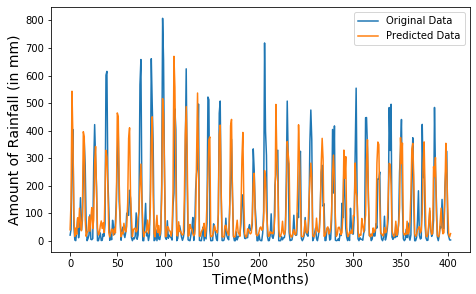

In [15]:
# plot showing difference between actual test data and predicted test data
plt.figure(figsize=[5*1.5,3*1.5])
plt.plot(range(y_test.shape[0]),y_test,label="Original Data")
plt.plot(range(y_test.shape[0]),pred,label="Predicted Data")
plt.legend(loc='best')
plt.ylabel('Amount of Rainfall (in mm)', fontsize="14")
plt.xlabel('Time(Months)', fontsize="14")
plt.show()

In [37]:
print("MAE : ", np.mean(abs(y_test-pred)))

MAE :  63.15734824378891


In [38]:
print("RMSE : ", np.sqrt(np.mean(np.square(y_test-pred))))

RMSE :  101.45438306703713


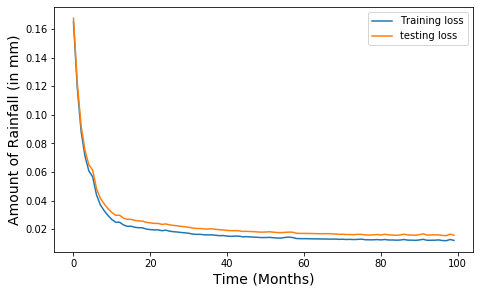

In [41]:
plt.figure(figsize=[5*1.5,3*1.5])
plt.plot(range(len(train_loss)),train_loss,label="Training loss")
plt.plot(range(len(test_loss)),test_loss,label="testing loss")
plt.legend(loc='best')
plt.ylabel('Amount of Rainfall (in mm)', fontsize="14")
plt.xlabel('Time (Months)', fontsize="14")
plt.show()